# Machine Learning ALP Model

## Background
Diabetes is a significant health problem in Indonesia, affecting 19.5 million people. Projections indicate a 150% increase in cases within the next 20 years (Zuhdi, 2023). This is primarily due to a lack of awareness about the risks of high sugar intake and a carbohydrate-heavy diet. Current efforts prioritize treatment over prevention, while early risk assessment could substantially reduce the disease burden.

## Dataset
Our dataset comprises 253,680 health records from the BRFSS, including 22 features like physical activity and smoking status. This annually collected data has no missing values, requiring minimal data cleaning.

# Preprocessing
## Imports

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
import graphviz 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import export_graphviz
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import skl2onnx
from skl2onnx import convert
from skl2onnx.common.data_types import FloatTensorType

## Load Dataset

In [2]:
url = "diabetes_012_health_indicators_BRFSS2015.csv"
data = pd.read_csv(url)
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [3]:
data.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [4]:
# Check for object data types in the dataset
object_columns = data.select_dtypes(include=['object']).columns.tolist()
print("Object columns:", object_columns)

Object columns: []


### Check for Null Values

In [5]:
# Check for missing values and the data types of each column
missing_values = data.isnull().sum()
data_types = data.dtypes

missing_values, data_types.head()

(Diabetes_012            0
 HighBP                  0
 HighChol                0
 CholCheck               0
 BMI                     0
 Smoker                  0
 Stroke                  0
 HeartDiseaseorAttack    0
 PhysActivity            0
 Fruits                  0
 Veggies                 0
 HvyAlcoholConsump       0
 AnyHealthcare           0
 NoDocbcCost             0
 GenHlth                 0
 MentHlth                0
 PhysHlth                0
 DiffWalk                0
 Sex                     0
 Age                     0
 Education               0
 Income                  0
 dtype: int64,
 Diabetes_012    float64
 HighBP          float64
 HighChol        float64
 CholCheck       float64
 BMI             float64
 dtype: object)

### Check for duplicate values

In [6]:
# Check for duplicate rows in the dataset
duplicates = data.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicates.sum()

print(f"Number of duplicate rows: {num_duplicates}")

# Display the duplicate rows (if any)
if num_duplicates > 0:
    duplicate_rows = data[duplicates]
    print("Duplicate rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

Number of duplicate rows: 23899
Duplicate rows:
        Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
1242             2.0     1.0       1.0        1.0  27.0     1.0     0.0   
1563             0.0     0.0       0.0        1.0  21.0     1.0     0.0   
2700             0.0     0.0       0.0        1.0  32.0     0.0     0.0   
3160             0.0     0.0       0.0        1.0  21.0     0.0     0.0   
3332             0.0     0.0       0.0        1.0  24.0     0.0     0.0   
...              ...     ...       ...        ...   ...     ...     ...   
253492           2.0     1.0       1.0        1.0  33.0     0.0     0.0   
253550           0.0     0.0       0.0        1.0  25.0     0.0     0.0   
253563           0.0     0.0       1.0        1.0  24.0     1.0     0.0   
253597           0.0     0.0       0.0        1.0  24.0     0.0     0.0   
253638           0.0     0.0       0.0        1.0  24.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits 

### Treat duplicate values

In [7]:
# Remove duplicate rows
data_cleaned = data.drop_duplicates()

# Confirm the changes
print(f"Number of rows before cleaning: {len(data)}")
print(f"Number of rows after cleaning: {len(data_cleaned)}")


Number of rows before cleaning: 253680
Number of rows after cleaning: 229781


## EDA

In [8]:
binary_columns = [col for col in data.columns if data[col].nunique() == 2]
print(f"Binary columns: {binary_columns}")

Binary columns: ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']


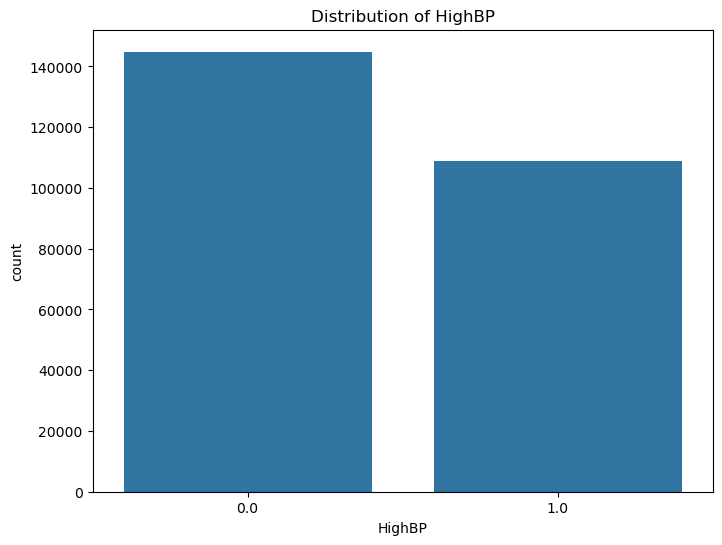

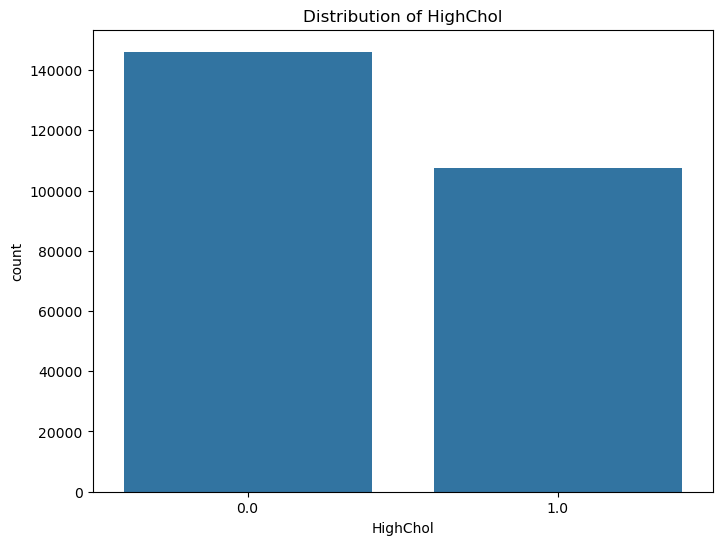

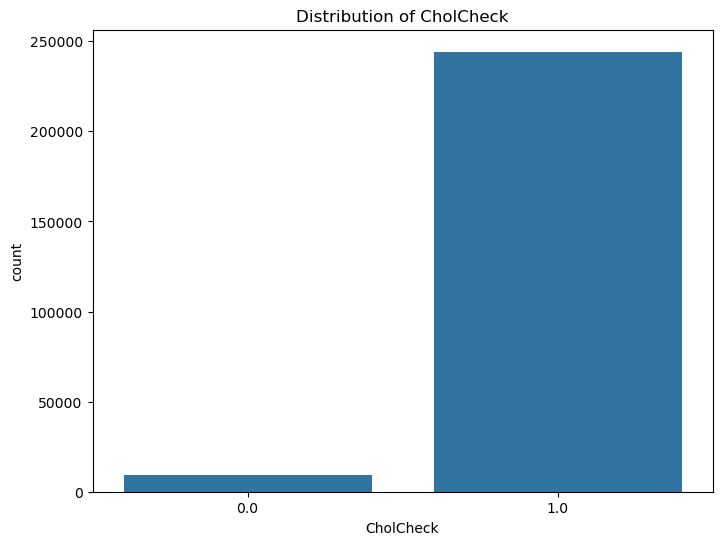

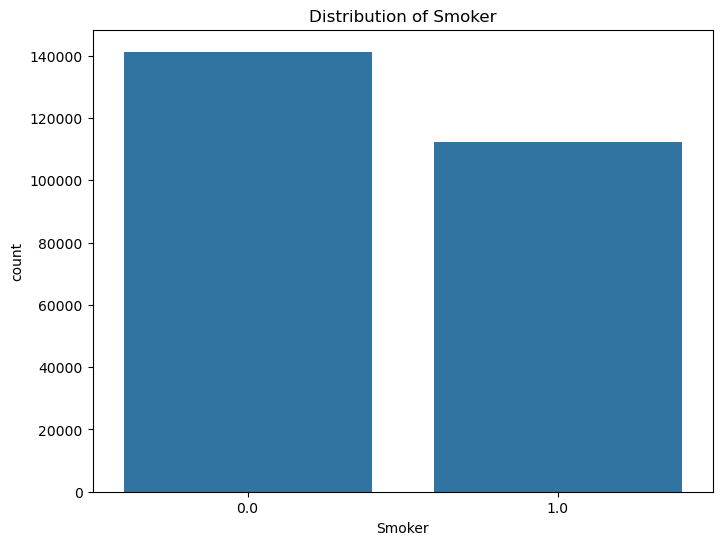

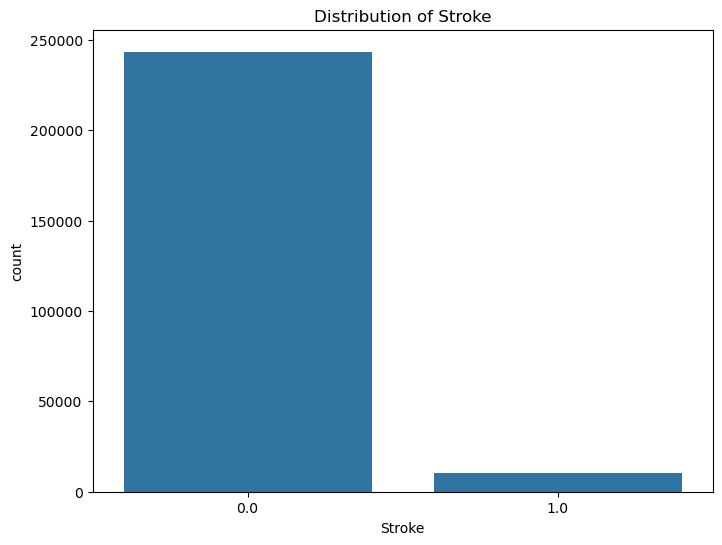

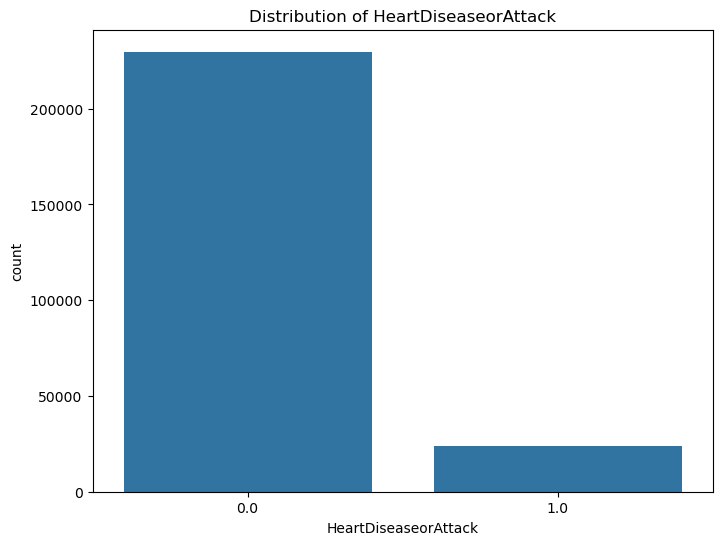

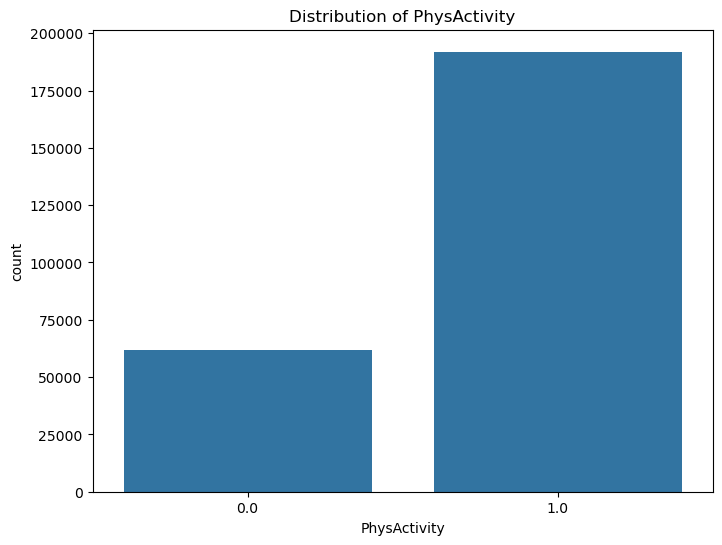

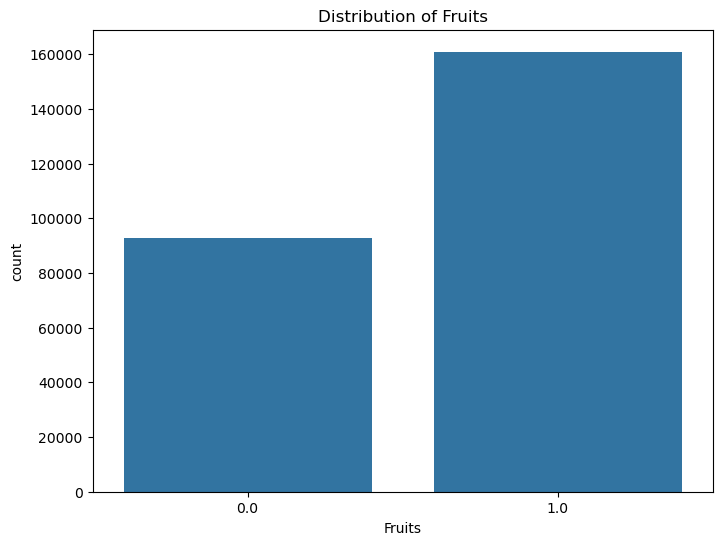

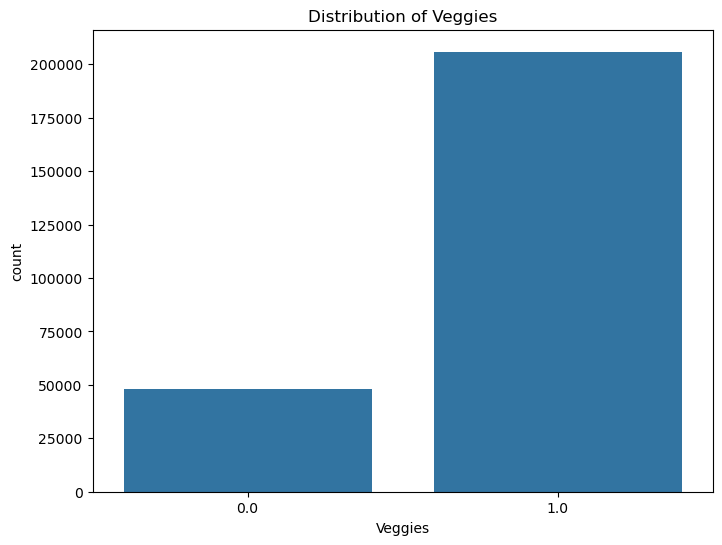

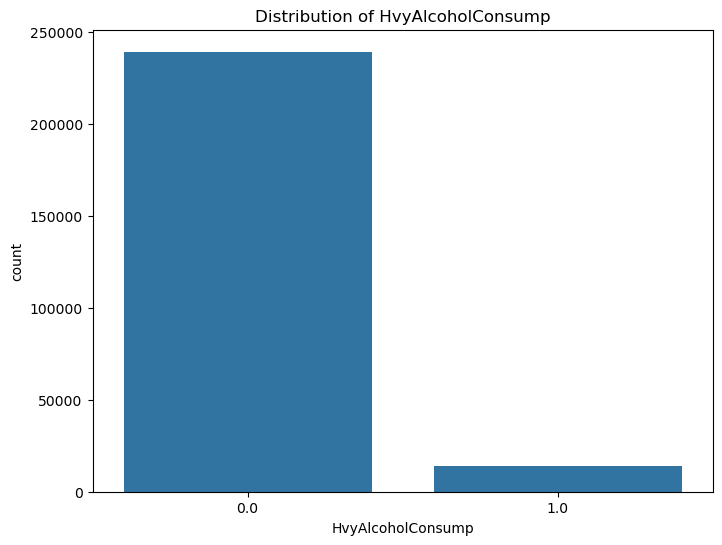

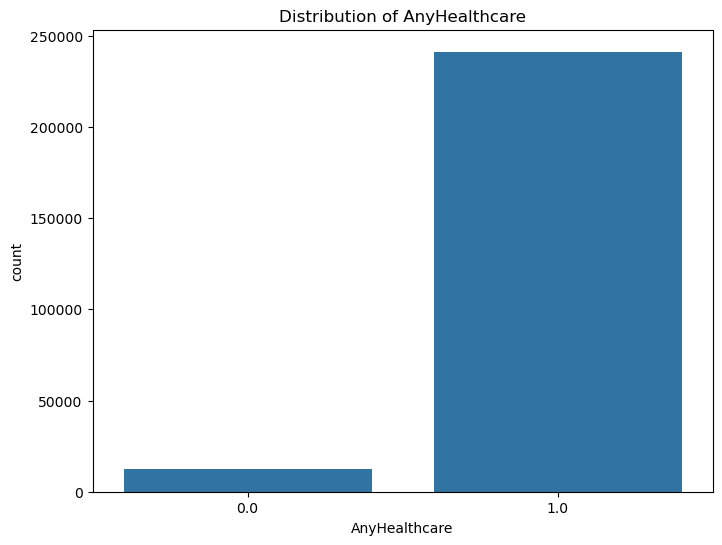

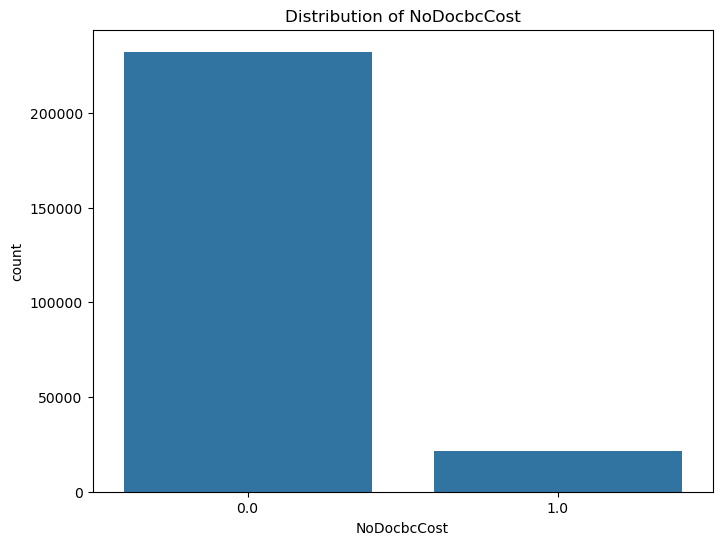

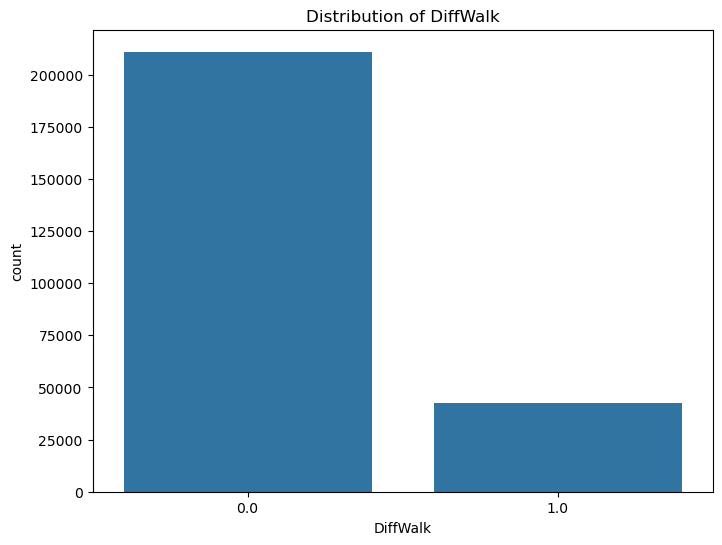

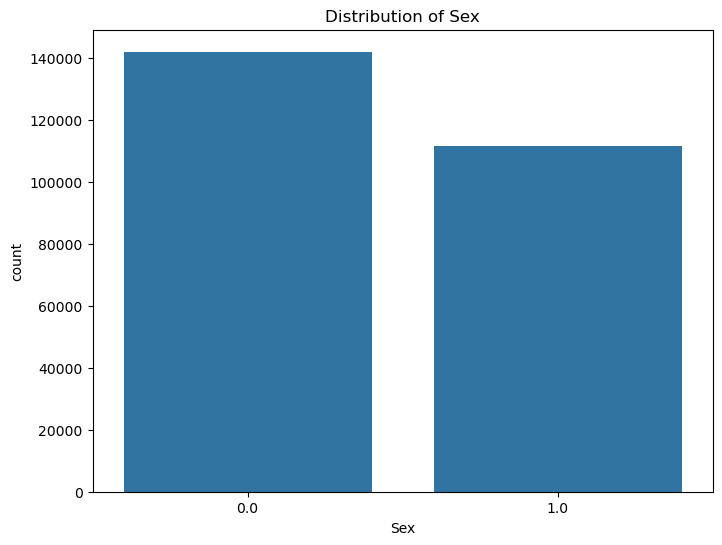

In [9]:
# Count plot for each binary column
for col in binary_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=data[col])
    plt.title(f'Distribution of {col}')
    plt.show()

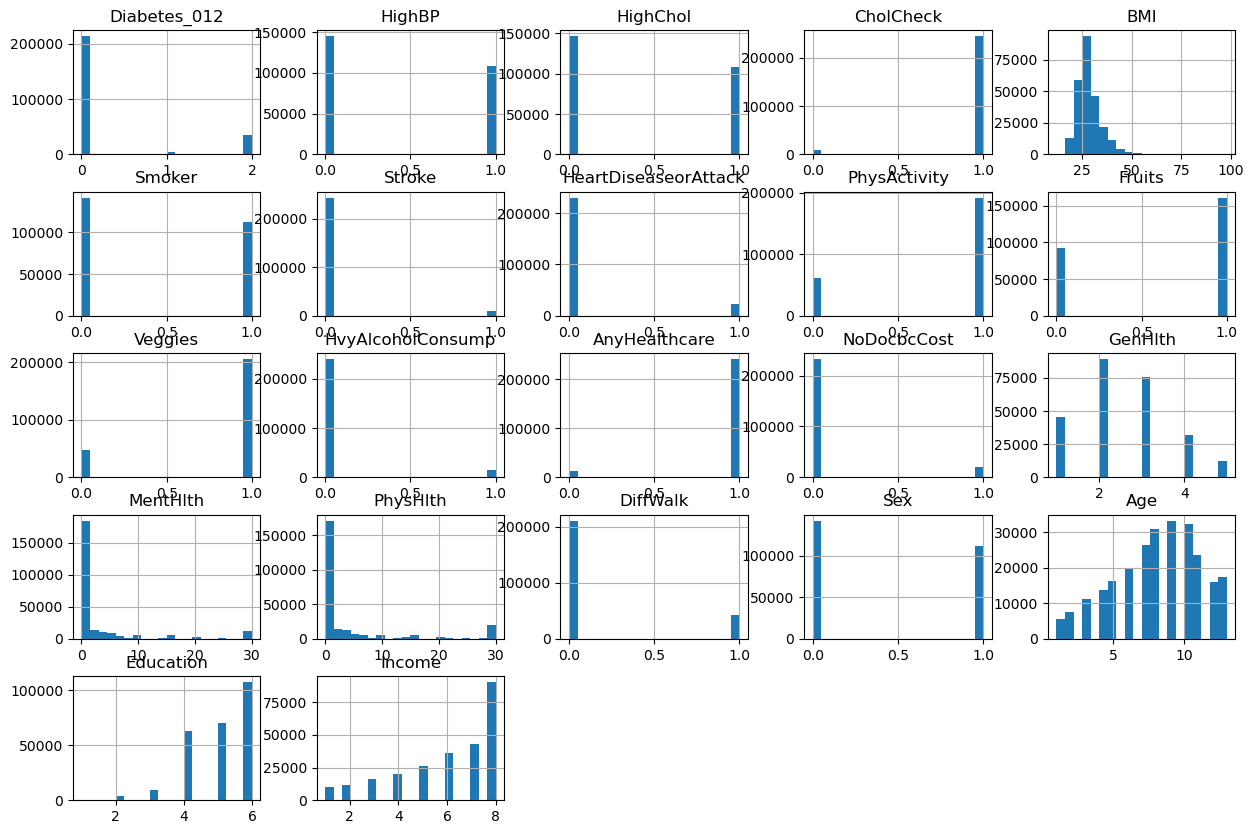

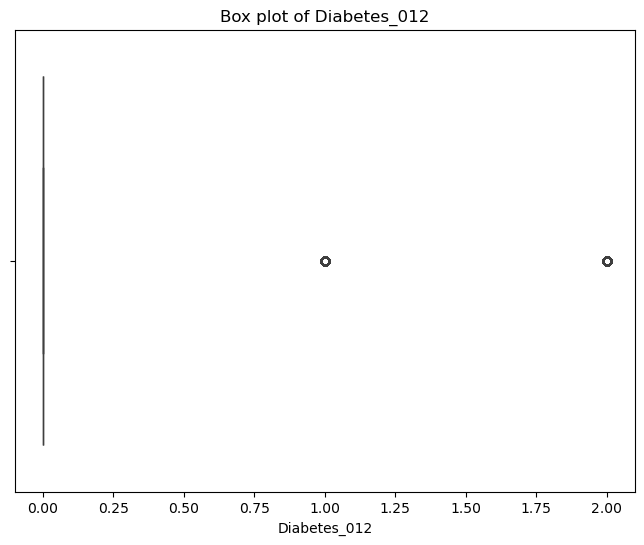

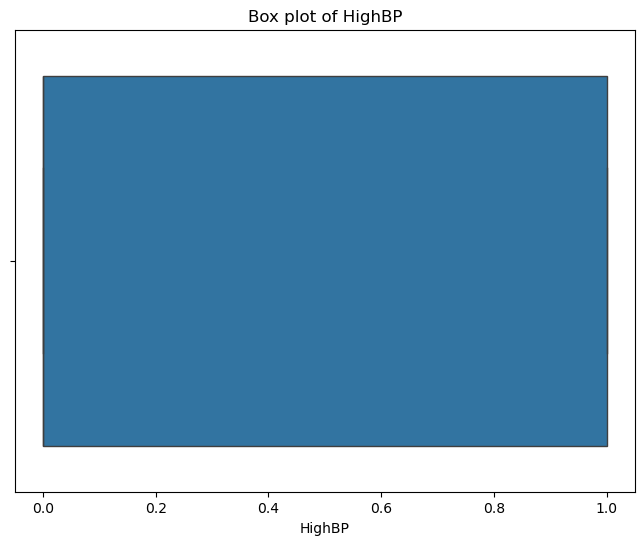

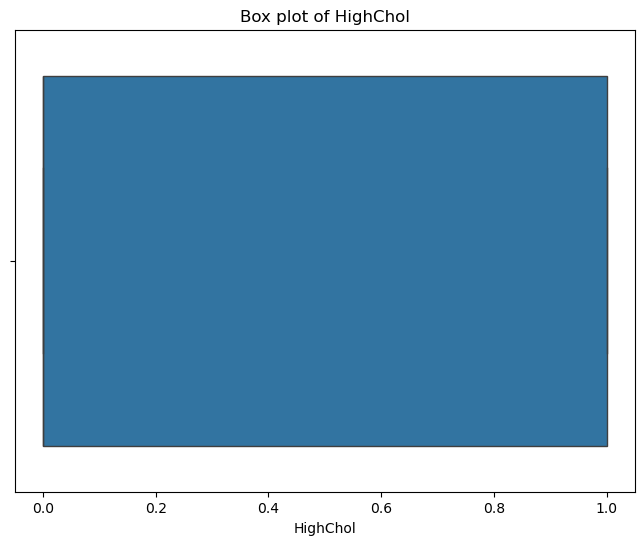

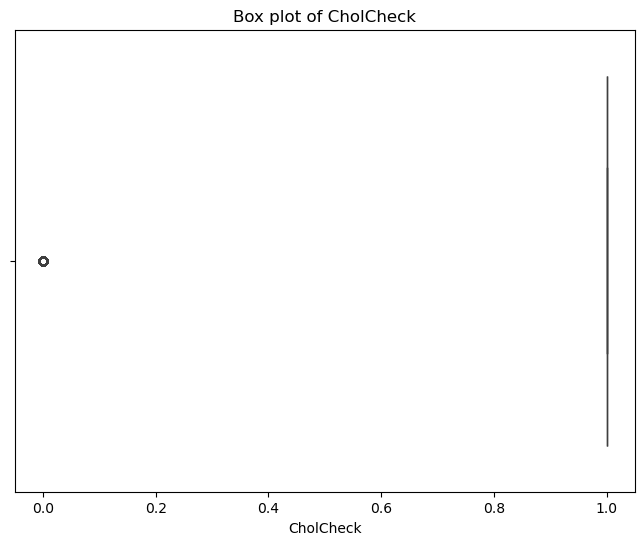

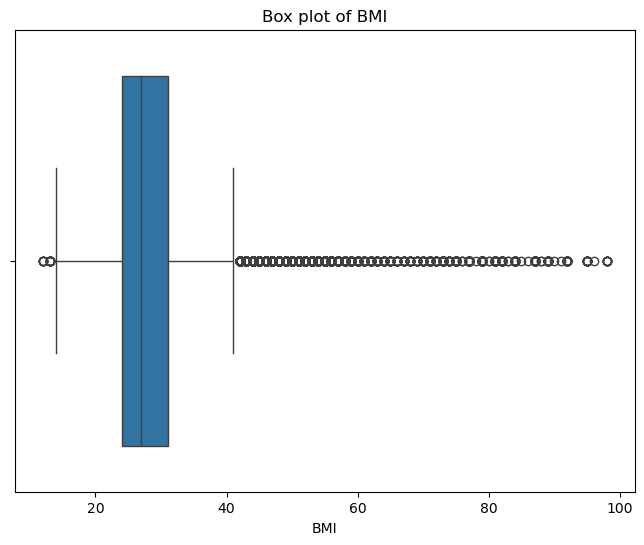

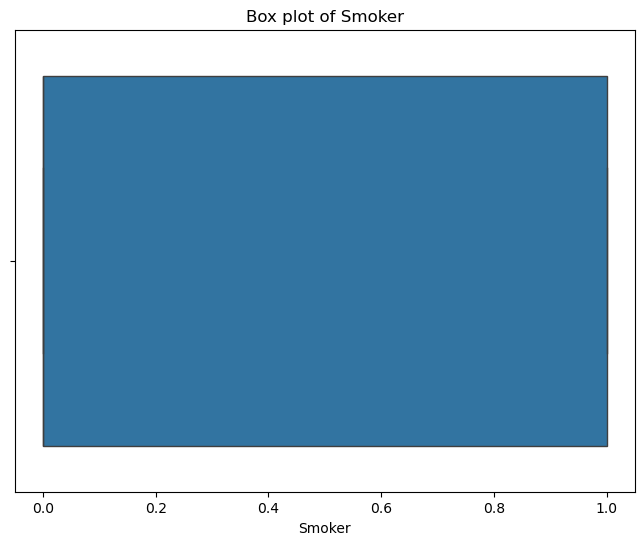

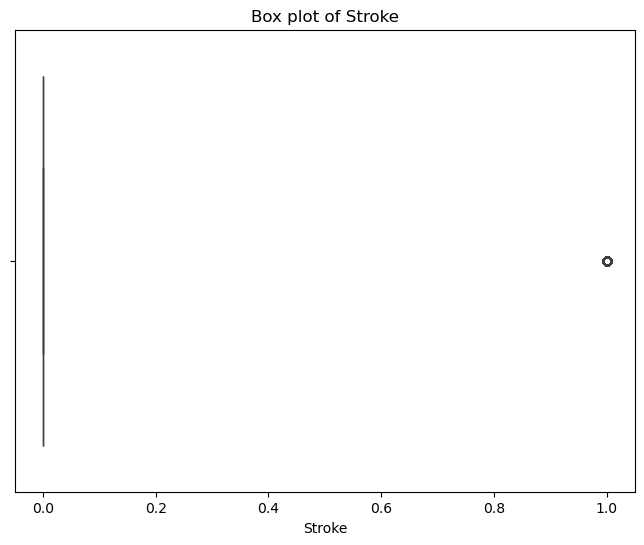

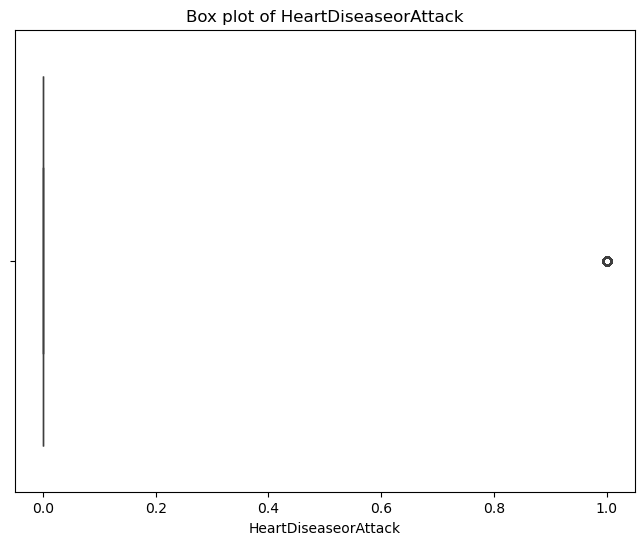

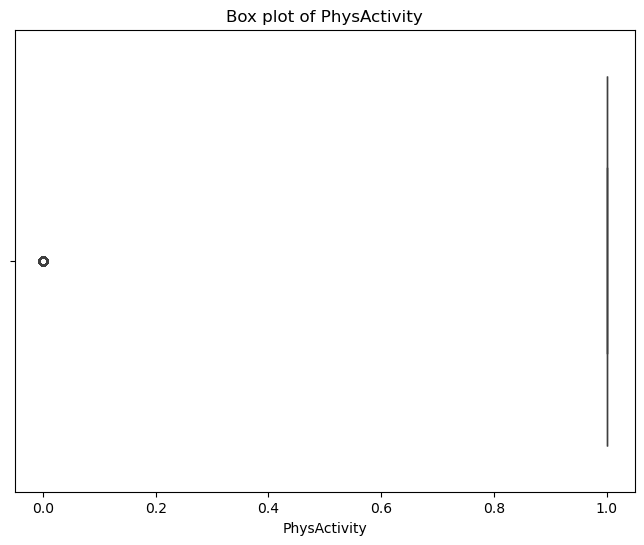

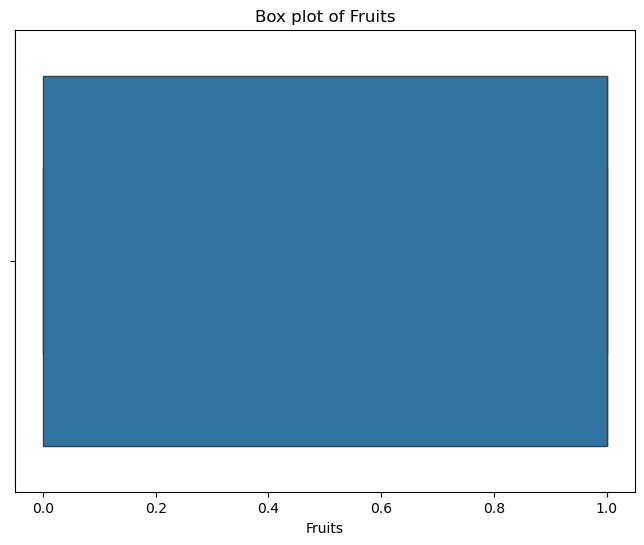

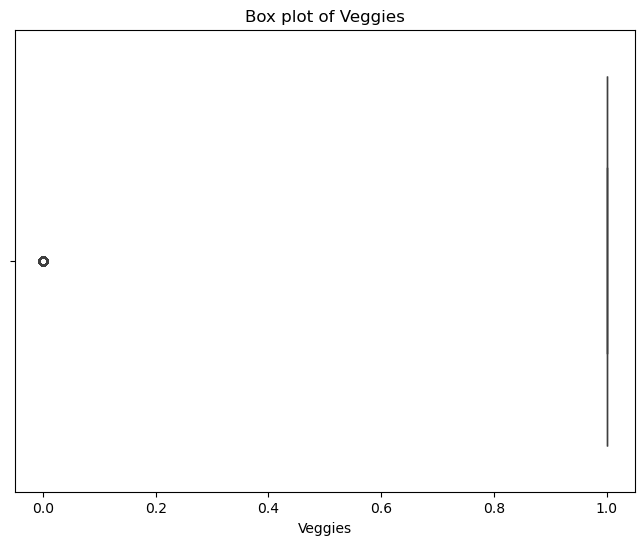

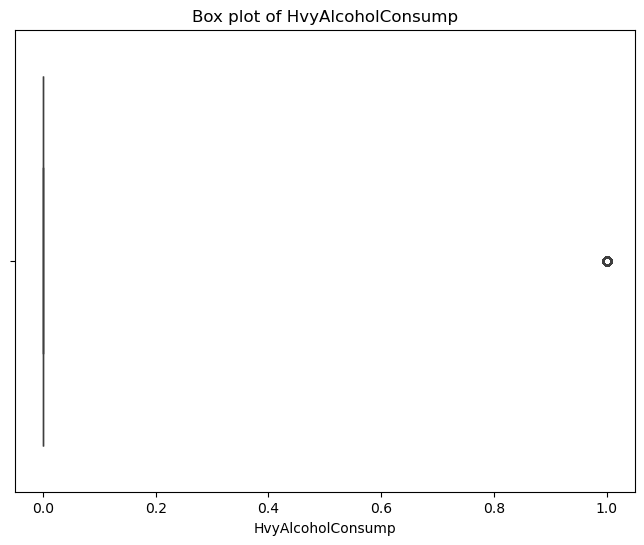

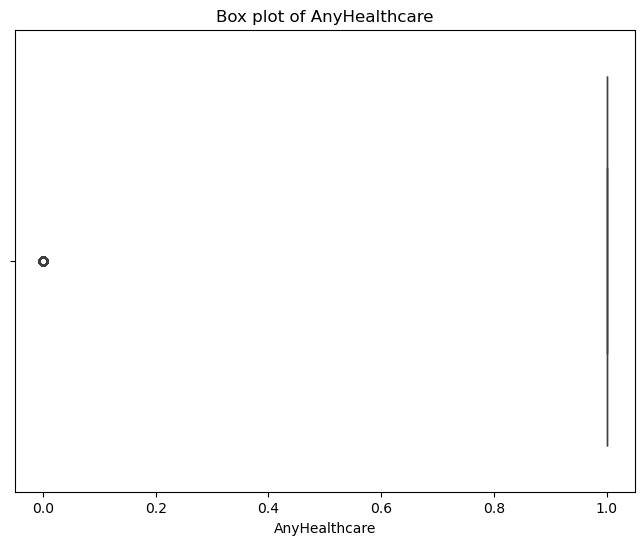

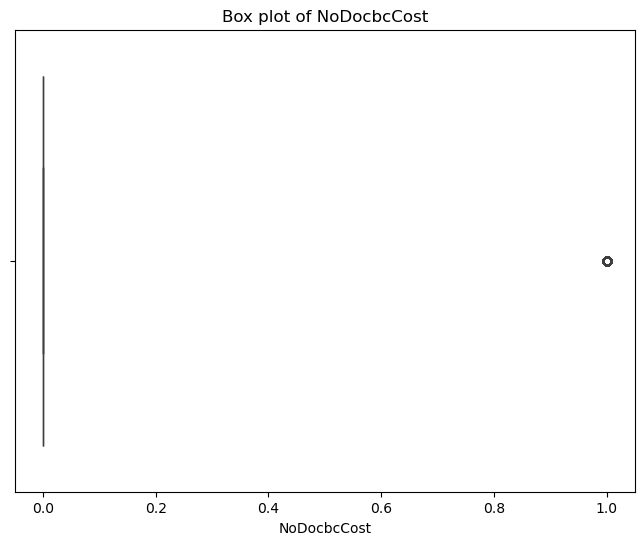

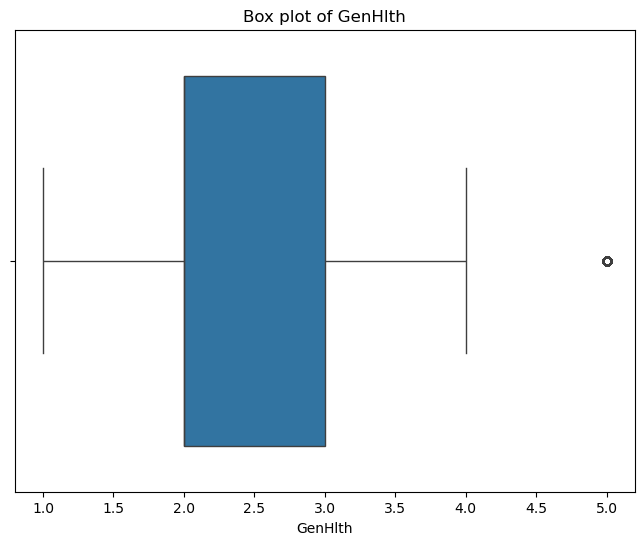

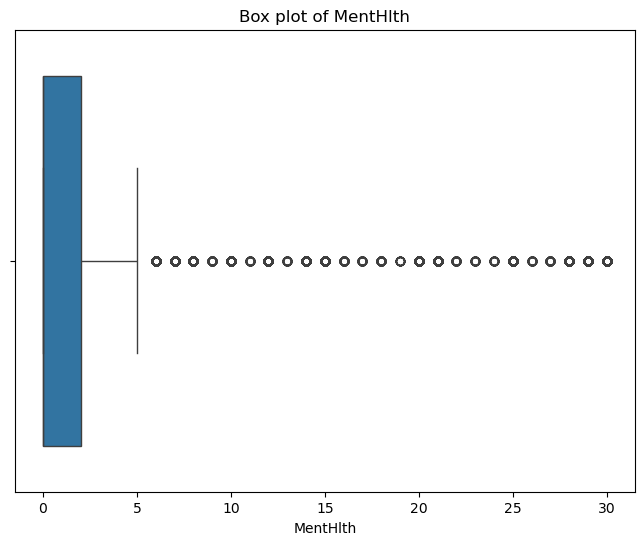

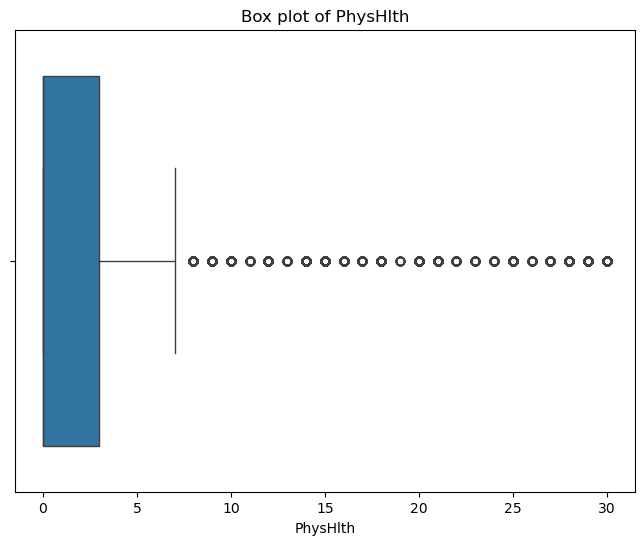

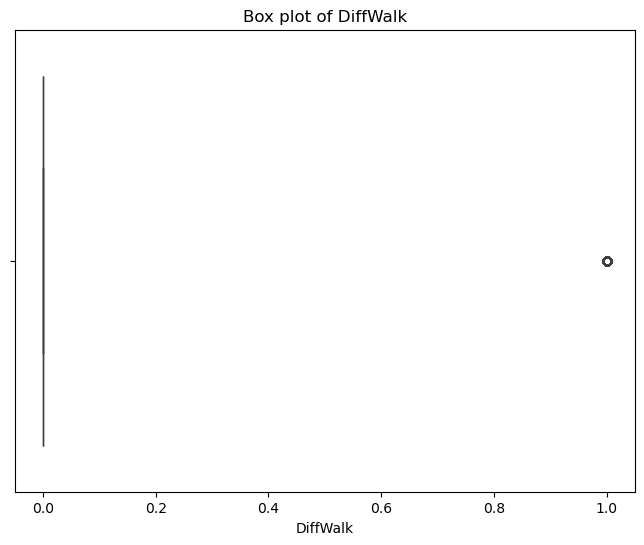

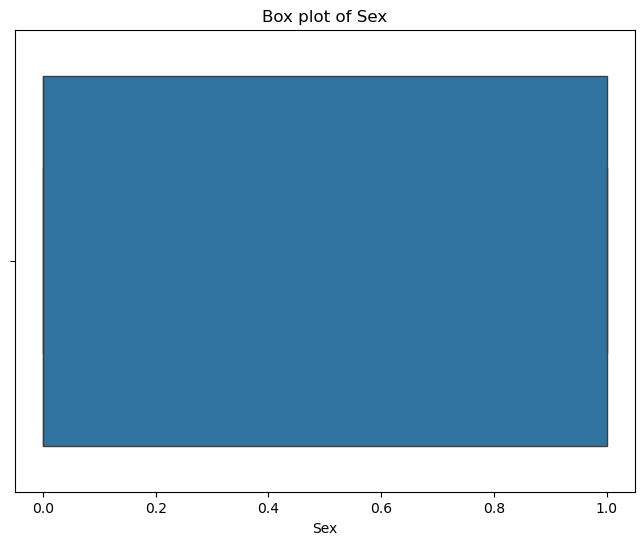

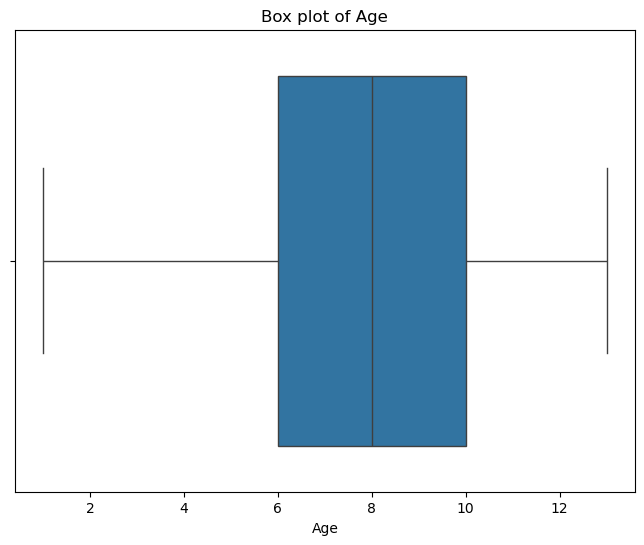

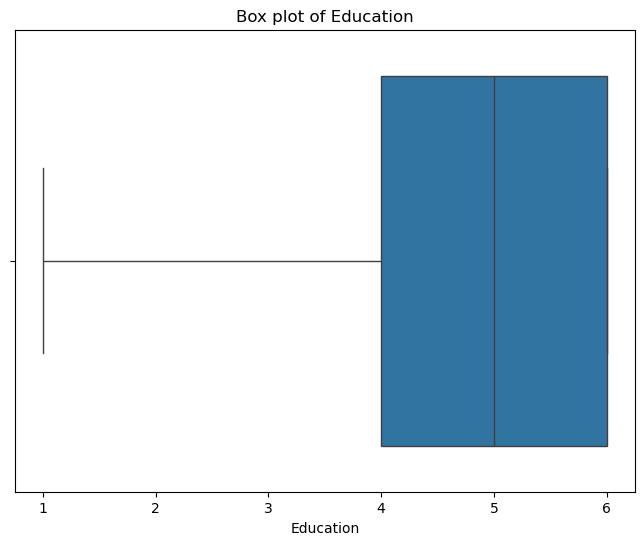

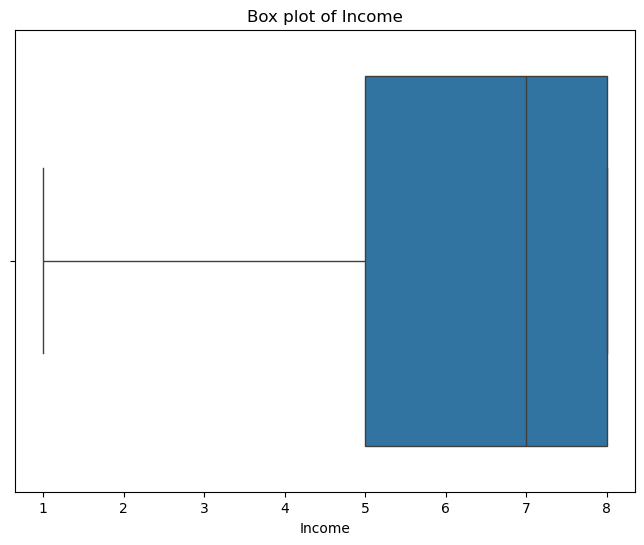

        Diabetes_012         HighBP       HighChol      CholCheck  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        0.296921       0.429001       0.424121       0.962670   
std         0.698160       0.494934       0.494210       0.189571   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       1.000000   
50%         0.000000       0.000000       0.000000       1.000000   
75%         0.000000       1.000000       1.000000       1.000000   
max         2.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke  HeartDiseaseorAttack  \
count  253680.000000  253680.000000  253680.000000         253680.000000   
mean       28.382364       0.443169       0.040571              0.094186   
std         6.608694       0.496761       0.197294              0.292087   
min        12.000000       0.000000       0.000000              0.000000  

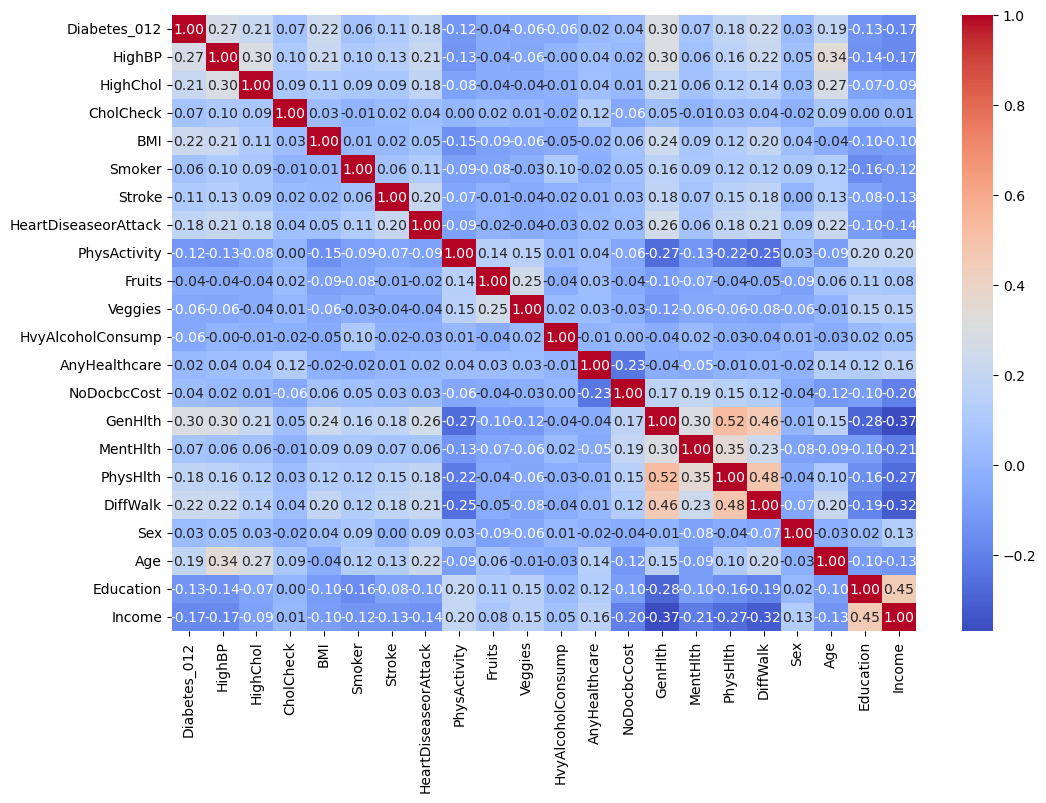

Outlier rows:
        Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
1                0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                0.0     1.0       1.0        1.0  28.0     0.0     0.0   
8                2.0     1.0       1.0        1.0  30.0     1.0     0.0   
14               0.0     0.0       1.0        1.0  33.0     1.0     1.0   
18               0.0     0.0       0.0        0.0  23.0     0.0     0.0   
...              ...     ...       ...        ...   ...     ...     ...   
253670           2.0     1.0       1.0        1.0  25.0     0.0     0.0   
253671           0.0     1.0       1.0        1.0  23.0     0.0     1.0   
253672           0.0     1.0       0.0        1.0  30.0     1.0     0.0   
253676           2.0     1.0       1.0        1.0  18.0     0.0     0.0   
253679           2.0     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
1          

In [10]:
# Univariate Analysis: Histograms, Box plots, Summary Statistics
data.select_dtypes(include=['float64', 'int64']).hist(bins=20, figsize=(15, 10))
plt.show()

# Box plots for numerical columns
for col in data.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[col])
    plt.title(f'Box plot of {col}')
    plt.show()

# Summary statistics for numerical columns
print(data.describe())

# Correlation heatmap
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

# Outlier Detection (Z-score)
z_scores = data.select_dtypes(include=['float64', 'int64']).apply(zscore)
outliers = (z_scores > 3) | (z_scores < -3)
outlier_data = data[outliers.any(axis=1)]
print("Outlier rows:")
print(outlier_data)

# Handle missing data: Impute with median
data_imputed = data.fillna(data.median())

# Feature Scaling (StandardScaler)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.select_dtypes(include=['float64', 'int64']))
scaled_data_df = pd.DataFrame(scaled_data, columns=data.select_dtypes(include=['float64', 'int64']).columns)

In [11]:
# Compute the correlation matrix for numerical columns
corr_matrix = data.corr()

# Show the correlation of 'Diabetes_012' with other columns
diabetes_correlation = corr_matrix['Diabetes_012'].sort_values(ascending=False)
print(diabetes_correlation)

Diabetes_012            1.000000
GenHlth                 0.302587
HighBP                  0.271596
BMI                     0.224379
DiffWalk                0.224239
HighChol                0.209085
Age                     0.185026
HeartDiseaseorAttack    0.180272
PhysHlth                0.176287
Stroke                  0.107179
MentHlth                0.073507
CholCheck               0.067546
Smoker                  0.062914
NoDocbcCost             0.035436
Sex                     0.031040
AnyHealthcare           0.015410
Fruits                 -0.042192
HvyAlcoholConsump      -0.057882
Veggies                -0.058972
PhysActivity           -0.121947
Education              -0.130517
Income                 -0.171483
Name: Diabetes_012, dtype: float64


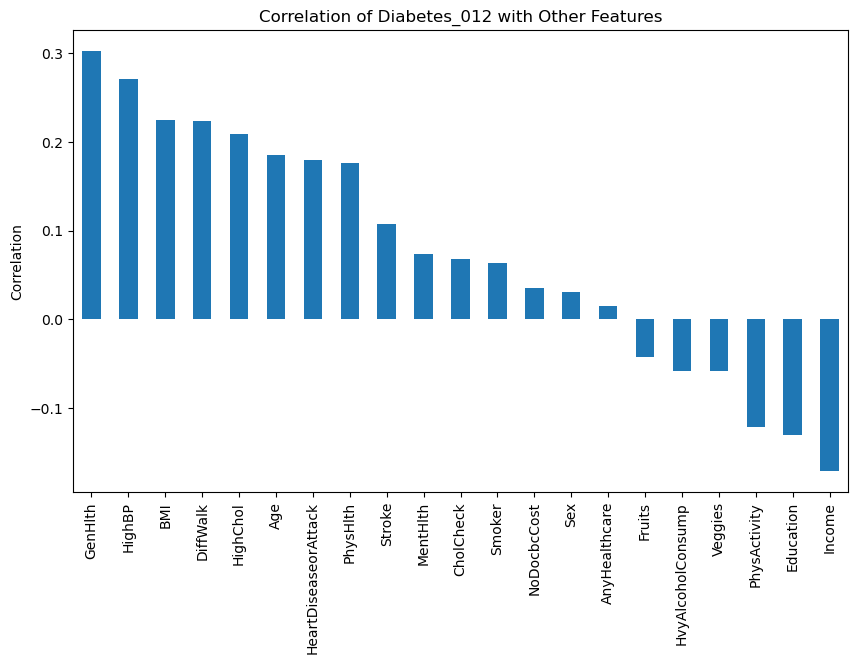

In [12]:
# Visualize the correlation of 'diabetes_012' with other columns using a bar plot
plt.figure(figsize=(10, 6))
diabetes_correlation.drop('Diabetes_012').plot(kind='bar')
plt.title('Correlation of Diabetes_012 with Other Features')
plt.ylabel('Correlation')
plt.show()

## Training

### Prep the Dataset

In [13]:
# Separate features and target variable
X = data.drop(columns=['Diabetes_012'])  # Features
y = data['Diabetes_012']  # Target

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Perform Grid Search Random Forest

In [14]:
# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [15]:
# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

In [ ]:
# Fit GridSearchCV
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=

In [ ]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Get the best model
best_rf_model = grid_search.best_estimator_

In [ ]:
# Make predictions on the test set
y_pred = best_rf_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on Test Set: {accuracy:.4f}")

### Evaluation

In [ ]:
# Make predictions on the test set
y_pred = best_rf_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on Test Set: {accuracy:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

# Visualize Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report (Precision, Recall, F1-Score)
class_report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{class_report}")

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, best_rf_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
print(f"AUC: {roc_auc:.4f}")

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'Random Forest (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

### Export model into onnx models to be used on android projects locally

In [ ]:
# Convert the RandomForest model to ONNX
onnx_model = skl2onnx.convert(
    model=best_rf_model,  # the best RandomForest model from GridSearchCV
    initial_types=[('input', FloatTensorType([None, X_train.shape[1]]))]  # Define the input tensor type
)

# Save the ONNX model to a file
onnx_model_path = "random_forest_model.onnx"
with open(onnx_model_path, "wb") as f:
    f.write(onnx_model.SerializeToString())

print(f"ONNX model saved to {onnx_model_path}")
